In [ ]:
# Big Mart Sales 데이터 셋을 이용한 회귀분석
# 평균 판매량(weight, fat content, type, mrp )
# 매장의 특징(year, size, location, type)

# 상픔무게별 평균 판매량
# 상품가격별 평균 판매량
# 매장 크기별 평균 판매량
# 지역별 평균 판매량


In [80]:
import numpy as np
import pandas as pd
from mglearn import datasets 
from matplotlib import pyplot as plt
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [81]:
mart = pd.read_csv('c:/dataset/bigmartsales1.txt')
print(mart.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [26]:
print(mart['Item_Weight'].isnull())

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7        True
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18       True
19      False
20      False
21       True
22      False
23       True
24      False
25      False
26      False
27      False
28      False
29       True
        ...  
8493    False
8494    False
8495    False
8496    False
8497    False
8498    False
8499    False
8500    False
8501    False
8502    False
8503    False
8504     True
8505    False
8506    False
8507    False
8508    False
8509    False
8510    False
8511    False
8512    False
8513    False
8514    False
8515    False
8516    False
8517    False
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool


In [23]:
mart['Item_Weight2'] = mart['Item_Weight'].fillna(mart['Item_Weight'].mean())

In [27]:
print(mart['Item_Weight2'].isnull())

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
8493    False
8494    False
8495    False
8496    False
8497    False
8498    False
8499    False
8500    False
8501    False
8502    False
8503    False
8504    False
8505    False
8506    False
8507    False
8508    False
8509    False
8510    False
8511    False
8512    False
8513    False
8514    False
8515    False
8516    False
8517    False
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight2, Length: 8523, dtype: bool


  Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0           FDA15        9.300                 1         0.016047          4   
1           DRC01        5.920                 2         0.019278         14   
2           FDN15       17.500                 1         0.016760         10   
4           NCD19        8.930                 1         0.000000          9   
5           FDP36       10.395                 2         0.000000          0   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   
1   48.2692            OUT018                       2009      Medium   
2  141.6180            OUT049                       1999      Medium   
4   53.8614            OUT013                       1987        High   
5   51.4008            OUT018                       2009      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  Item_Weight2  \
0       

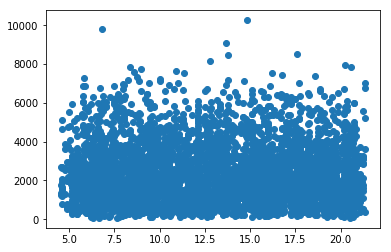

In [72]:
# 상픔무게별 평균 판매량
# 산점도 그리기
print(mart.head())
plt.scatter(mart['Item_Weight2'],mart['Item_Outlet_Sales'])
plt.show()

In [54]:
lr = LinearRegression()
X = mart.iloc[:,12][:,np.newaxis] 
     # 1 차원 데이터를 2차원 행렬로 변환 = >  a = [1,2,3,] => a[:,np.newaxis] => a = [[1],[2],[3]]
y = mart.iloc[:,11]  # 배달시간 추출
lr.fit(X, y) 
print('기울기', lr.coef_)  # 가중치 weight
print('절편', lr.intercept_)  # 편향 bias
print('훈련 측정값 R^2', X, y)

기울기 [4.66386534]
절편 2121.322587859695
훈련 측정값 R^2 [[ 9.3 ]
 [ 5.92]
 [17.5 ]
 ...
 [10.6 ]
 [ 7.21]
 [14.8 ]] 0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
5        556.6088
6        343.5528
7       4022.7636
8       1076.5986
9       4710.5350
10      1516.0266
11      2187.1530
12      1589.2646
13      2145.2076
14      1977.4260
15      1547.3192
16      1621.8888
17       718.3982
18      2303.6680
19      2748.4224
20      3775.0860
21      4064.0432
22      1587.2672
23       214.3876
24      4078.0250
25       838.9080
26      1065.2800
27       308.9312
28       178.4344
29       125.8362
          ...    
8493    4727.1800
8494    1637.8680
8495    4314.3840
8496    3715.1640
8497    2247.0750
8498    1601.2490
8499    2976.1260
8500    1907.5170
8501    1508.0370
8502    3020.0688
8503    3392.9168
8504    4138.6128
8505    2117.2440
8506    3944.8650
8507     515.9950
8508    2587.9646
8509     424.7804
8510    7182.6504
8511    4

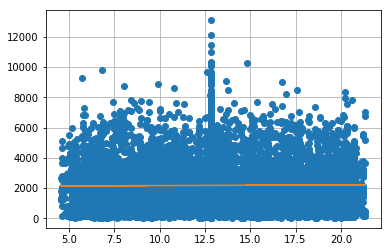

In [39]:
# 선형식 그래프 그리기
#  y= ax + b
plt.plot(X,y, 'o')
plt.plot(X,X*lr.coef_ +lr.intercept_)
plt.grid()
plt.show()

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

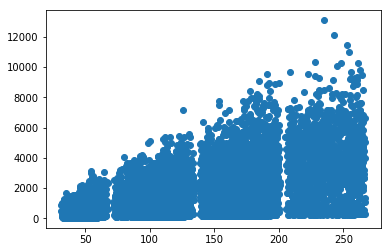

In [34]:
# 상품가격별 평균 판매량
# 산점도 그리기
print(mart.head())
plt.scatter(mart['Item_MRP'],mart['Item_Outlet_Sales'])
plt.show()

In [55]:
lr = LinearRegression()
X = mart.iloc[:,5][:,np.newaxis] 
     # 1 차원 데이터를 2차원 행렬로 변환 = >  a = [1,2,3,] => a[:,np.newaxis] => a = [[1],[2],[3]]
y = mart.iloc[:,11]  # 배달시간 추출
lr.fit(X, y) 
print('기울기', lr.coef_)  # 가중치 weight
print('절편', lr.intercept_)  # 편향 bias
print('훈련 측정값 R^2', X, y)

기울기 [15.55302354]
절편 -11.575142825171952
훈련 측정값 R^2 [[249.8092]
 [ 48.2692]
 [141.618 ]
 ...
 [ 85.1224]
 [103.1332]
 [ 75.467 ]] 0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
5        556.6088
6        343.5528
7       4022.7636
8       1076.5986
9       4710.5350
10      1516.0266
11      2187.1530
12      1589.2646
13      2145.2076
14      1977.4260
15      1547.3192
16      1621.8888
17       718.3982
18      2303.6680
19      2748.4224
20      3775.0860
21      4064.0432
22      1587.2672
23       214.3876
24      4078.0250
25       838.9080
26      1065.2800
27       308.9312
28       178.4344
29       125.8362
          ...    
8493    4727.1800
8494    1637.8680
8495    4314.3840
8496    3715.1640
8497    2247.0750
8498    1601.2490
8499    2976.1260
8500    1907.5170
8501    1508.0370
8502    3020.0688
8503    3392.9168
8504    4138.6128
8505    2117.2440
8506    3944.8650
8507     515.9950
8508    2587.9646
8509     424.7804
8510  

In [56]:
# 선형 회귀 모델 생성 2
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

In [57]:
print('기울기', lr.coef_)  # 가중치 weight
print('절편', lr.intercept_)  # 편향 bias
print('훈련 측정값 R^2', lr.score(X_train,y_train))
print('검증 측정값 R^2', lr.score(X_test, y_test))

기울기 [15.55302354]
절편 -11.575142825171952
훈련 측정값 R^2 0.32654300469233744
검증 측정값 R^2 0.3094224009492086


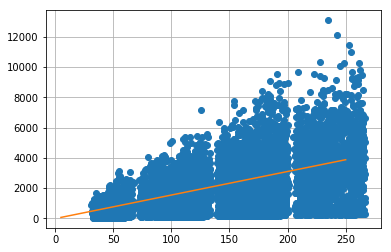

In [61]:
# 선형식 그래프 그리기
#  y= ax + b
plt.plot(X,y, 'o')
x= np.linspace(5,250,100)
plt.plot(x, x*lr.coef_ +lr.intercept_)
plt.grid()
plt.show()

In [41]:
print(mart['Outlet_Size'].isnull())

0       False
1       False
2       False
3        True
4       False
5       False
6       False
7       False
8        True
9        True
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25       True
26      False
27      False
28       True
29      False
        ...  
8493     True
8494     True
8495    False
8496     True
8497    False
8498    False
8499    False
8500     True
8501     True
8502     True
8503    False
8504    False
8505    False
8506    False
8507    False
8508     True
8509     True
8510    False
8511    False
8512    False
8513    False
8514     True
8515    False
8516    False
8517    False
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [47]:
# pd.to_numeric
mapping = {'Small': 1,'Medium' :2,'High': 3}
mart['Outlet_Size2'] = mart['Outlet_Size'].map(mapping)
mart['Outlet_Size2'] = mart['Outlet_Size2'].fillna(2)

In [48]:
print(mart['Outlet_Size2'].isnull())

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
8493    False
8494    False
8495    False
8496    False
8497    False
8498    False
8499    False
8500    False
8501    False
8502    False
8503    False
8504    False
8505    False
8506    False
8507    False
8508    False
8509    False
8510    False
8511    False
8512    False
8513    False
8514    False
8515    False
8516    False
8517    False
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Outlet_Size2, Length: 8523, dtype: bool


  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

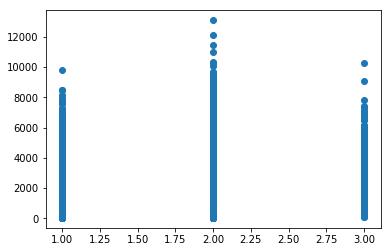

In [50]:
# 매장 크기별 평균 판매량
# 산점도 그리기
print(mart.head())
plt.scatter(mart['Outlet_Size2'],mart['Item_Outlet_Sales'])
plt.show()

In [52]:
lr = LinearRegression()
X = mart.iloc[:,13][:,np.newaxis] 
     # 1 차원 데이터를 2차원 행렬로 변환 = >  a = [1,2,3,] => a[:,np.newaxis] => a = [[1],[2],[3]]
y = mart.iloc[:,11]  # 배달시간 추출
lr.fit(X, y) 
print('기울기', lr.coef_)  # 가중치 weight
print('절편', lr.intercept_)  # 편향 bias
print('훈련 측정값 R^2', X, y)

기울기 [244.98280276]
절편 1733.1741775596677
훈련 측정값 R^2 [[2.]
 [2.]
 [2.]
 ...
 [1.]
 [2.]
 [1.]] 0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
5        556.6088
6        343.5528
7       4022.7636
8       1076.5986
9       4710.5350
10      1516.0266
11      2187.1530
12      1589.2646
13      2145.2076
14      1977.4260
15      1547.3192
16      1621.8888
17       718.3982
18      2303.6680
19      2748.4224
20      3775.0860
21      4064.0432
22      1587.2672
23       214.3876
24      4078.0250
25       838.9080
26      1065.2800
27       308.9312
28       178.4344
29       125.8362
          ...    
8493    4727.1800
8494    1637.8680
8495    4314.3840
8496    3715.1640
8497    2247.0750
8498    1601.2490
8499    2976.1260
8500    1907.5170
8501    1508.0370
8502    3020.0688
8503    3392.9168
8504    4138.6128
8505    2117.2440
8506    3944.8650
8507     515.9950
8508    2587.9646
8509     424.7804
8510    7182.6504
8511    4207.8560
8512  

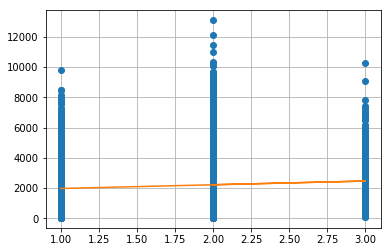

In [53]:
# 선형식 그래프 그리기
#  y= ax + b
plt.plot(X,y, 'o')
plt.plot(X,X*lr.coef_ +lr.intercept_)
plt.grid()
plt.show()

In [ ]:
# 지역별 평균 판매량

In [85]:
# 모든 상품 feature 다
mart = mart.dropna()
mart['Item_Type'] = pd.Categorical(mart['Item_Type'])
mart['Item_Type'] = mart['Item_Type'].cat.codes
mart['Item_Fat_Content'] = pd.Categorical(mart['Item_Fat_Content'])
mart['Item_Fat_Content'] = mart['Item_Fat_Content'].cat.codes
date6 = mart.ix[:, ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility','Item_Type','Item_MRP']]
target = mart.ix[:, 'Item_Outlet_Sales'] 

lr.fit(date6, y)
X_train, X_test, y_train, y_test = train_test_split(date6,target, random_state = 0)
print('기울기', lr.coef_)  # 가중치 weight
print('절편', lr.intercept_)  # 편향 bias
print('훈련 측정값 R^2',X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


ValueError: Found input variables with inconsistent numbers of samples: [4650, 8523]

In [70]:

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)


ValueError: Found input variables with inconsistent numbers of samples: [4650, 8523]

In [64]:
# 각 특성이 회귀분석 영향을 미치는 정도
col = ['Item_Weight', 'Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP']
coef = pd.Series(lr.coef_, col).sort_values()
coef.plot(kind = 'bar')
plt.show()

ValueError: Length of passed values is 1, index implies 5

In [ ]:
# 편향 bias vs 분산 variance
# 편향 : 학습 알고리즘에서 발생되는 오차의 정도
# 적당히 낮은 편향 - 과적합
# 너무 높은 편향 - 미적합

# 분산 : 데이터셋에 포함된 변동성 여부
# 적당히 낮은 분산 - 노이즈 noise가 적음
# 너무 높은 분산 - 노이즈가 많음

# 학습 알고리즘 상에서 기대 오차를 분석하는 한가지 방법으로 
# 편향. 분산을 내제하고 있는 데이터는 어떤 모델링으러 줄일 수 없는 오류의 총합으로
# 여김
# 따라서, 편향, 분산의 trade-off를 이해해서 적절한 학습의 효과가 나도록 데이터 셋의 특성을 잘 조합해야 함



In [ ]:
# 일반적인 회귀분석 : 회귀계수(절편, 기울기) 추정량 구함
# 잔차의 제곱합을 최소로 하는 최소제곱법 사욫

# 실제 회귀모델은 단일 변수가 아닌 다중 변수가 많음
# 설명변수 증가 => 변수간 강한 상관관계 => 다중공선성 문제
# 최소제곱법을 이용한 회귀계수 추정량 커짐 = > 정확도 저하

# 따라서, 중요한 변수를 선정하고, 중요하지 않은 변수는 제외

# 리지, 라쏘 회귀
# 라쏘 회귀(L1 -norm 패널티)
# 원래의 최소제곱법에 제약을 가함
# 중요하지 않은 변수들을

# 리지 회귀(L1 -norm 패널티)

# 엘라스틱넷 회귀


In [76]:
# 리지 회귀
from sklearn.linear_model import Ridge, Lasso

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data6,y, random_state = 0)

In [ ]:
lrR = Ridge()
lrR.fit(X_train, y_train)

In [ ]:
print('릿지 훈련 정확도', lrR.score(X_train, y_train))
print('릿지 검증 정확도', lrR.score(X_test, y_test) )

In [ ]:
# alpha = 0.1
lrR = Ridge(alpha = 0.1)
lrR.fit(X_train, y_train)
print('릿지 훈련 정확도', lrR.score(X_train, y_train))
print('릿지 검증 정확도', lrR.score(X_test, y_test) )
print('사용한 특성수', np.sum(lrR.coef_!=0))

In [ ]:
# alpha = 0.01
lrR = Ridge(alpha = 0.01)
lrR.fit(X_train, y_train)
print('릿지 훈련 정확도', lrR.score(X_train, y_train))
print('릿지 검증 정확도', lrR.score(X_test, y_test) )